In [1]:
import numpy as np
import pandas as pd

In [3]:
data = pd.read_csv("data/house pricing.csv")
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
print(data.shape)

(1460, 81)


In [8]:
Sale_Price = pd.Series(data['SalePrice'])
Sale_Price.head(15)

0     208500
1     181500
2     223500
3     140000
4     250000
5     143000
6     307000
7     200000
8     129900
9     118000
10    129500
11    345000
12    144000
13    279500
14    157000
Name: SalePrice, dtype: int64

# Central tendency of the data

In [9]:
mean = np.mean(Sale_Price)
print(mean)

180921.19589041095


In [11]:
median = np.median(Sale_Price)
print(median)

q1 = Sale_Price.quantile(0.25)     # lower quartile
q3 = Sale_Price.quantile(0.75)     # upper quartile
print ("Q1:",q1, "\nQ3:", q3, "\nIQR:", q3-q1)

163000.0
Q1: 129975.0 
Q3: 214000.0 
IQR: 84025.0


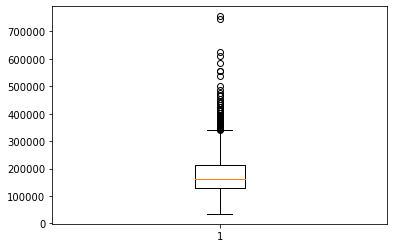

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.boxplot(Sale_Price)
plt.show()

In [14]:
outlier_lower_limit = q1 - 1.5*(q3 - q1)
outlier_upper_limit = q3 + 1.5*(q3 - q1)
print(outlier_lower_limit)
print(outlier_upper_limit)

3937.5
340037.5


In [18]:
# finding the number of outliers

lower_limit_outliers = Sale_Price[Sale_Price < outlier_lower_limit].count()
print("Lower limit outliers:", lower_limit_outliers)

upper_limit_outliers = Sale_Price[Sale_Price>outlier_upper_limit].count()
print("Upper limit outliers:", upper_limit_outliers)

print("Total no. of outliers:", lower_limit_outliers+upper_limit_outliers)

Lower limit outliers: 0
Upper limit outliers: 61
Total no. of outliers: 61


(array([  5.,   6.,  11.,  27.,  50.,  49.,  98., 134., 148., 125., 107.,
        111., 106.,  70.,  53.,  51.,  48.,  45.,  31.,  27.,  28.,  14.,
         13.,  22.,  11.,  13.,   4.,   6.,   9.,   8.,   5.,   3.,   4.,
          3.,   2.,   2.,   1.,   1.,   1.,   0.,   0.,   1.,   0.,   2.,
          0.,   1.,   0.,   0.,   1.,   1.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   2.]),
 array([ 34900.        ,  46901.66666667,  58903.33333333,  70905.        ,
         82906.66666667,  94908.33333333, 106910.        , 118911.66666667,
        130913.33333333, 142915.        , 154916.66666667, 166918.33333333,
        178920.        , 190921.66666667, 202923.33333333, 214925.        ,
        226926.66666667, 238928.33333333, 250930.        , 262931.66666667,
        274933.33333333, 286935.        , 298936.66666667, 310938.33333333,
        322940.        , 334941.66666667, 346943.33333333, 358945.        ,
        370946.66666667, 382948.33333333, 394950.        ,

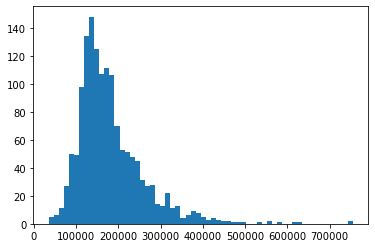

In [50]:
plt.hist(Sale_Price, bins = 60)

# histogram shows positive skew

In [27]:
mode = Sale_Price.mode()
print(mode[0])

140000


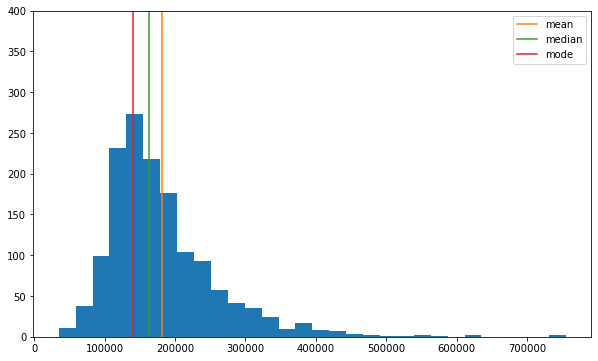

In [47]:
# Plotting hist with mean, median, mode

plt.figure(figsize = (10,6))
plt.hist(Sale_Price, bins = 30)
plt.plot([mean]*400, range(400), label ='mean')
plt.plot([median]*400, range(400), label = 'median')
plt.plot([mode]*400, range(400), label = 'mode')
plt.ylim(0, 400)
plt.legend()
plt.show()

# Spread of the data

In [51]:
range = np.max(Sale_Price) - np.min(Sale_Price)
range

720100

In [53]:
variance = Sale_Price.var()
variance

6311111264.297451

In [55]:
from math import sqrt

std = sqrt(variance)
print(std)

79442.50288288663


# Correlation

In [56]:
data.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


In [62]:
living_room_area = data.GrLivArea
np.corrcoef(Sale_Price, living_room_area)[1,0]

0.7086244776126522

             LotArea  GrLivArea  GarageArea  SalePrice
LotArea     1.000000   0.263116    0.180403   0.263843
GrLivArea   0.263116   1.000000    0.468997   0.708624
GarageArea  0.180403   0.468997    1.000000   0.623431
SalePrice   0.263843   0.708624    0.623431   1.000000


<AxesSubplot:>

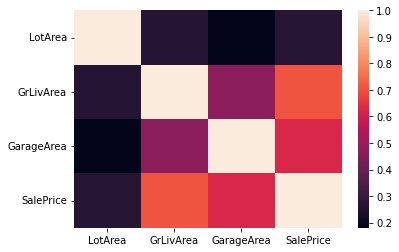

In [64]:
# Finding correlation between the 4 continuous variables

import seaborn as sns
x = data[['LotArea','GrLivArea','GarageArea','SalePrice']]
corr = x.corr()
print(corr)
sns.heatmap(corr)

# Practice

In [68]:
# In the weather dataset, find the mean and median for Wind Speed and Temperature columns

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("Data/weather_2012.csv")
df.head(3)

,Date/Time,Temp (C),Dew Point Temp (C),Rel Hum (%),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Weather
0,2012-01-01 00:00:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,2012-01-01 01:00:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,2012-01-01 02:00:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"


In [80]:
wind_speed_mean = df['Wind Spd (km/h)'].mean()
wind_speed_median = df['Wind Spd (km/h)'].median()
print("Wind Speed:\nMean :", wind_speed_mean)
print("Median :", wind_speed_median)
print()

wind_speed_mean = df['Temp (C)'].mean()
wind_speed_median = df['Temp (C)'].median()
print("Temperature:\nMean: ", wind_speed_mean)
print("Median:", wind_speed_median)

Wind Speed:
Mean : 14.94546903460838
Median : 13.0

Temperature:
Mean:  8.79814435336981
Median: 9.3


In [78]:
# find the mode for the Weather column
weather_mode = df['Weather'].mode()
print(weather_mode[0])

Mainly Clear


Text(0, 0.5, 'Frequency')

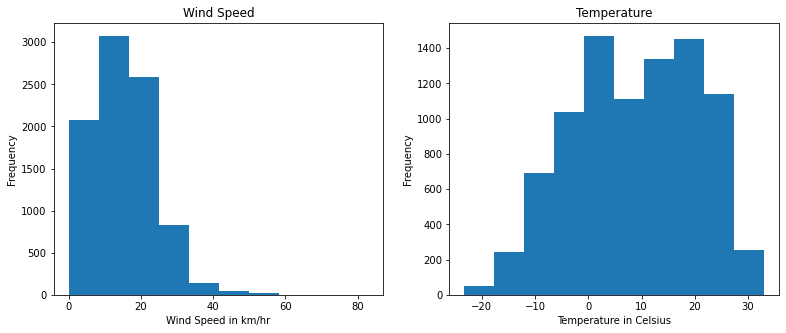

In [95]:
# Find out the skewness, if any of the Wind Speed and Temperature columns by plotting a histogram
plt.figure(figsize=[13,5])

plt.subplot (1,2,1)
plt.title("Wind Speed")
plt.hist(df['Wind Spd (km/h)'])
plt.xlabel('Wind Speed in km/hr')
plt.ylabel('Frequency')

plt.subplot (1,2,2)
plt.title("Temperature")
plt.hist(df['Temp (C)'])
plt.xlabel('Temperature in Celsius')
plt.ylabel('Frequency')

In [99]:
# Find out the variance and standard deviation for Dew Point Temperature column.

variance_dewpoint = df['Dew Point Temp (C)'].var()
print("Variance =",variance_dewpoint)

stddev_dewpoint = np.sqrt(variance_dewpoint)
print("Standard deviation =", stddev_dewpoint)

Variance = 118.44126310397384
Standard deviation = 10.883072319155737


<AxesSubplot:>

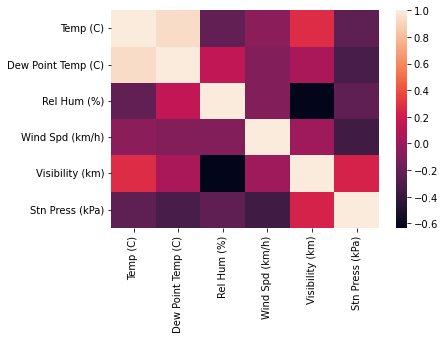

In [102]:
# Find out the correlation between all the continuous features in the weather dataset and plot a heatmap using Seaborn.

correlation = df.corr()
sns.heatmap(correlation)